In [2]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

In [58]:
tornado_df = pd.read_csv('./1950-2018_torn.csv',parse_dates=['date'])

In [59]:
tornado_df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,9.5,150,2,0,1,0,0,0,0,0
1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.2,150,2,1,2,189,0,0,0,0
2,1,1950,1,3,1950-01-03,11:10:00,3,IL,17,1,...,3.3,100,2,1,2,119,0,0,0,0
3,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.6,130,1,1,1,135,0,0,0,0
4,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.1,10,1,1,1,161,0,0,0,0


In [64]:
tornado_df.dtypes

om                int64
yr                int64
mo                int64
dy                int64
date     datetime64[ns]
time             object
tz                int64
st               object
stf               int64
stn               int64
mag               int64
inj               int64
fat               int64
loss            float64
closs           float64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
sg                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                int64
dtype: object

- om = count of tornadoes during the year, 
- yr = year, 
- mo = month, 
- dy = day, 
- date = ,
- time = ,
- tz = timezone, 
- st = state, 
- stf = state FIPS number
- stn = state number - number of this tornado
- mag = F-scale, EF scale after January 2007
- inj = injuries, 
- fat = fatalities, 
- loss = estimated property loss, 
- closs = estimated crop loss, 
- len = length in miles, 
- wid = width in yards, 
- ns = number of states affected by this tornado,
- sn = state number (1 = entire track info in this state)
- sg = tornado segment number(1 (entire track info),2, or -9)
- f1-f4 = county FIPS number
- fc = indicate if (E)F scales was altered (1=previous rating was -9 unknown)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002557C0EF1D0>]],
      dtype=object)

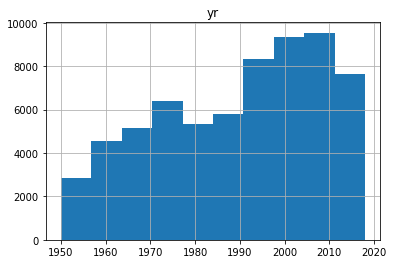

In [61]:
tornado_df.hist(column='yr')

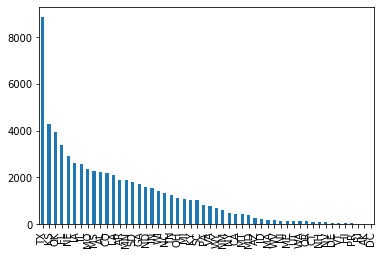

In [68]:
tornado_df["st"].value_counts().plot(kind="bar")

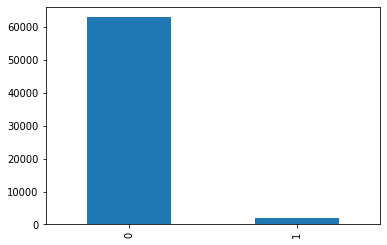

In [73]:
tornado_df["fc"].value_counts().plot(kind="bar")

In [63]:
len(tornado_df)

64825

In [65]:
import math
rday = []
for index in tornado_df.index:
#     print(tornado_df["date"][index])
#     print(tornado_df["date"][index].timetuple().tm_yday)
    day_of_year = tornado_df["date"][index].timetuple().tm_yday
    rday.append(day_of_year/365 * 2 * math.pi)
len(rday)

64825

In [66]:
tornado_df['rday']=rday
tornado_df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,rday
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,150,2,0,1,0,0,0,0,0,0.051643
1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,150,2,1,2,189,0,0,0,0,0.051643
2,1,1950,1,3,1950-01-03,11:10:00,3,IL,17,1,...,100,2,1,2,119,0,0,0,0,0.051643
3,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,130,1,1,1,135,0,0,0,0,0.051643
4,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,10,1,1,1,161,0,0,0,0,0.051643


In [67]:
tornado_df.tail()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,rday
64820,617020,2018,12,27,2018-12-27,10:15:00,3,LA,22,0,...,25,1,1,1,1,0,0,0,0,6.214328
64821,617021,2018,12,27,2018-12-27,10:29:00,3,MS,28,0,...,100,1,1,1,163,0,0,0,0,6.214328
64822,617022,2018,12,31,2018-12-31,12:35:00,3,KY,21,0,...,125,1,1,1,221,0,0,0,0,6.283185
64823,617023,2018,12,31,2018-12-31,13:43:00,3,IN,18,0,...,50,1,1,1,147,0,0,0,0,6.283185
64824,617024,2018,12,31,2018-12-31,14:38:00,3,IN,18,0,...,140,1,1,1,61,0,0,0,0,6.283185


Find the data where the state abbrevations don't match the state id (sft)

In [75]:
states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
st_not_seen = []
st_to_stf = {}
st_to_stf_not_seen = []
for index in tornado_df.index:
    if tornado_df["st"][index] not in st_to_stf:
        st_to_stf[tornado_df["st"][index]] = tornado_df["stf"][index]
    elif tornado_df["st"][index] in st_to_stf:
        if st_to_stf[tornado_df["st"][index]] != tornado_df["stf"][index]:
            st_to_stf_not_seen.append((index,tornado_df["st"][index],tornado_df["stf"][index])) 
print(st_to_stf)
print(st_to_stf_not_seen)

{'MO': 29, 'IL': 17, 'OH': 39, 'AR': 5, 'TX': 48, 'MS': 28, 'LA': 22, 'TN': 47, 'OK': 40, 'FL': 12, 'AL': 1, 'SC': 45, 'KS': 20, 'IA': 19, 'SD': 46, 'NE': 31, 'WY': 56, 'NC': 37, 'GA': 13, 'ND': 38, 'MN': 27, 'WI': 55, 'IN': 18, 'PA': 42, 'NM': 35, 'CT': 9, 'CO': 8, 'WV': 54, 'MD': 24, 'KY': 21, 'CA': 6, 'VA': 51, 'NJ': 34, 'MI': 26, 'MA': 25, 'NH': 33, 'OR': 41, 'NY': 36, 'MT': 30, 'AZ': 4, 'UT': 49, 'ME': 23, 'VT': 50, 'ID': 16, 'WA': 53, 'DE': 10, 'HI': 15, 'PR': 72, 'AK': 2, 'NV': 32, 'RI': 44, 'DC': 11}
[(43456, 'ID', 19), (43832, 'ID', 19), (44139, 'ID', 19), (58996, 'TX', 39)]


see the discrepencies between st and stf

In [80]:
tornado_df.groupby(["st", "stf"]).size()

st  stf
AK  2         4
AL  1      2216
AR  5      1883
AZ  4       251
CA  6       437
CO  8      2181
CT  9       109
DC  11        4
DE  10       63
FL  12     3392
GA  13     1703
HI  15       41
IA  19     2614
ID  16      210
    19        3
IL  17     2558
IN  18     1532
KS  20     4302
KY  21     1034
LA  22     2093
MA  25      174
MD  24      369
ME  23      134
MI  26     1053
MN  27     1877
MO  29     2374
MS  28     2272
MT  30      425
NC  37     1345
ND  38     1578
NE  31     2909
NH  33       97
NJ  34      151
NM  35      597
NV  32       93
NY  36      456
OH  39     1127
OK  40     3921
OR  41      118
PA  42      834
PR  72       26
RI  44       14
SC  45     1029
SD  46     1808
TN  47     1253
TX  39        1
    48     8860
UT  49      130
VA  51      752
VT  50       47
WA  53      122
WI  55     1403
WV  54      152
WY  56      694
dtype: int64

Starting: ID, 
Ending: ID, 
stf should be 16

In [82]:
tornado_df.iloc[43456]

om                        10
yr                      2002
mo                         2
dy                         7
date     2002-02-07 00:00:00
time                11:45:00
tz                         3
st                        ID
stf                       19
stn                        1
mag                        0
inj                        0
fat                        0
loss                       0
closs                      0
slat                   43.87
slon                  -116.5
elat                   43.87
elon                  -116.5
len                      0.1
wid                       20
ns                         1
sn                         1
sg                         1
f1                        45
f2                         0
f3                         0
f4                         0
fc                         0
rday                 0.65414
Name: 43456, dtype: object

Starting: ID, 
Ending: ID,
stf should be 16

In [83]:
tornado_df.iloc[43832]

om                       146
yr                      2002
mo                         6
dy                         1
date     2002-06-01 00:00:00
time                16:07:00
tz                         3
st                        ID
stf                       19
stn                       17
mag                        1
inj                        0
fat                        0
loss                    0.06
closs                      0
slat                    43.7
slon                 -112.15
elat                   43.73
elon                  -112.1
len                      2.5
wid                       70
ns                         1
sn                         1
sg                         1
f1                        51
f2                         0
f3                         0
f4                         0
fc                         0
rday                 2.61656
Name: 43832, dtype: object

Starting: ID,
Ending: ID,
stf should be 19

In [85]:
tornado_df.iloc[44139]

om                       307
yr                      2002
mo                         9
dy                        29
date     2002-09-29 00:00:00
time                17:50:00
tz                         3
st                        ID
stf                       19
stn                       34
mag                        0
inj                        0
fat                        0
loss                       0
closs                      0
slat                   43.87
slon                  -116.6
elat                   43.87
elon                 -116.58
len                        1
wid                       10
ns                         1
sn                         1
sg                         1
f1                        45
f2                         0
f3                         0
f4                         0
fc                         0
rday                 4.68226
Name: 44139, dtype: object

Starting: OH,
Ending: OH
st should be OH

In [86]:
tornado_df.iloc[58996]

om                    483178
yr                      2013
mo                        10
dy                        31
date     2013-10-31 00:00:00
time                23:07:00
tz                         3
st                        TX
stf                       39
stn                        0
mag                        0
inj                        0
fat                        0
loss                     0.1
closs                      0
slat                 39.9706
slon                 -82.529
elat                 39.9721
elon                -82.5273
len                     0.14
wid                       50
ns                         1
sn                         1
sg                         1
f1                        89
f2                         0
f3                         0
f4                         0
fc                         0
rday                 5.23312
Name: 58996, dtype: object

Correct the st and stf

In [88]:
# [(43456, 'ID', 19), (43832, 'ID', 19), (44139, 'ID', 19), (58996, 'TX', 39)]
tornado_df.at[43456,'stf'] = 16
tornado_df.at[43832,'stf'] = 16
tornado_df.at[44139,'stf'] = 16
tornado_df.at[58996,'st'] = 'OH'

In [92]:
tornado_df.iloc[58996]

om                    483178
yr                      2013
mo                        10
dy                        31
date     2013-10-31 00:00:00
time                23:07:00
tz                         3
st                        OH
stf                       39
stn                        0
mag                        0
inj                        0
fat                        0
loss                     0.1
closs                      0
slat                 39.9706
slon                 -82.529
elat                 39.9721
elon                -82.5273
len                     0.14
wid                       50
ns                         1
sn                         1
sg                         1
f1                        89
f2                         0
f3                         0
f4                         0
fc                         0
rday                 5.23312
Name: 58996, dtype: object

In [108]:
tornado_df.groupby(['st','stf']).size()

st  stf
AK  2         4
AL  1      2216
AR  5      1883
AZ  4       251
CA  6       437
CO  8      2181
CT  9       109
DC  11        4
DE  10       63
FL  12     3392
GA  13     1703
HI  15       41
IA  19     2614
ID  16      213
IL  17     2558
IN  18     1532
KS  20     4302
KY  21     1034
LA  22     2093
MA  25      174
MD  24      369
ME  23      134
MI  26     1053
MN  27     1877
MO  29     2374
MS  28     2272
MT  30      425
NC  37     1345
ND  38     1578
NE  31     2909
NH  33       97
NJ  34      151
NM  35      597
NV  32       93
NY  36      456
OH  39     1128
OK  40     3921
OR  41      118
PA  42      834
PR  72       26
RI  44       14
SC  45     1029
SD  46     1808
TN  47     1253
TX  48     8860
UT  49      130
VA  51      752
VT  50       47
WA  53      122
WI  55     1403
WV  54      152
WY  56      694
dtype: int64

In [101]:
tornado_df['st'].value_counts()

TX    8860
KS    4302
OK    3921
FL    3392
NE    2909
IA    2614
IL    2558
MO    2374
MS    2272
AL    2216
CO    2181
LA    2093
AR    1883
MN    1877
SD    1808
GA    1703
ND    1578
IN    1532
WI    1403
NC    1345
TN    1253
OH    1128
MI    1053
KY    1034
SC    1029
PA     834
VA     752
WY     694
NM     597
NY     456
CA     437
MT     425
MD     369
AZ     251
ID     213
MA     174
WV     152
NJ     151
ME     134
UT     130
WA     122
OR     118
CT     109
NH      97
NV      93
DE      63
VT      47
HI      41
PR      26
RI      14
AK       4
DC       4
Name: st, dtype: int64

In [109]:
tornado_df.dtypes

om                int64
yr                int64
mo                int64
dy                int64
date     datetime64[ns]
time             object
tz                int64
st               object
stf               int64
stn               int64
mag               int64
inj               int64
fat               int64
loss            float64
closs           float64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
sg                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                int64
rday            float64
dtype: object

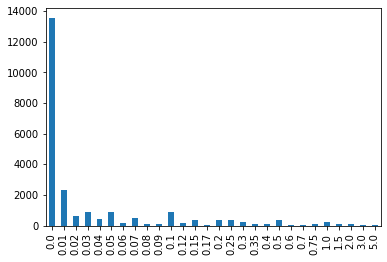

In [57]:
tornado_df['loss'].value_counts()[0:5].sort_index().plot(kind="bar")

In [114]:
len(tornado_df.loc[tornado_df['mag'] == -9])

111

In [115]:
tornado_df_pre = tornado_df.loc[tornado_df['mag'] != -9]
len(tornado_df) - len(tornado_df_pre)

111

In [117]:
len(tornado_df_pre.loc[tornado_df_pre['loss'] < 0])

0

In [119]:
# drop the om, yr, mo, dy, date, st, stn, ns, sn, sg, f1, f2, f3, f4, fc
tornado_df_pre = tornado_df_pre.drop(['om','yr','mo','dy','date','st','stn','ns','sn','sg','f1','f2','f3','f4','fc'], axis=1)

In [120]:
tornado_df_pre.head()

,time,tz,stf,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,rday
0,11:00:00,3,29,3,3,0,6.0,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0.051643
1,11:00:00,3,29,3,3,0,6.0,0.0,38.77,-90.22,38.82,-90.12,6.2,150,0.051643
2,11:10:00,3,17,3,0,0,5.0,0.0,38.82,-90.12,38.83,-90.03,3.3,100,0.051643
3,11:55:00,3,17,3,3,0,5.0,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0.051643
4,16:00:00,3,39,1,1,0,4.0,0.0,40.88,-84.58,0.00,0.00,0.1,10,0.051643


In [125]:
len(tornado_df_pre.loc[tornado_df_pre['mag']<0])

0

In [127]:
len(tornado_df_pre.loc[tornado_df_pre['tz']!=3])

37

In [126]:
path="./1950-2018_torn_preprocessed.csv"
tornado_df_pre.to_csv(path)